# Analyzing and classifying customers using Python and Logistic Regression

Analyzing and classifying customer ad clicks using Python involves leveraging data analysis and machine learning to extract insights and predict customer behavior. This practice is pivotal in in understanding customer preferences and refining ad strategies. 

Python's libraries like pandas, NumPy, scikit-learn, and matplotlib are instrumental in data preprocessing, analysis, visualization, and modeling. Deploying these models allows classifying new customer interactions and optimize ad campaigns based on predicted outcomes. This approach enables businesses to tailor their advertising efforts more effectively.

The analysis will begin by loading the dataset, then clean and process it further by identify missing or incorrect values and rectifying them. Exploratory data analysis will be done to gather further insights on the data. Then, Logistic Regression will be applied to classify whether the customer will click on the ad or not.

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Exploring the dataset

In [4]:
# Looking at the shape (number of elements) of the data
data.shape

(1000, 10)

The data has 1000 rows and 10 columns meaning the data contains data about 1000 customer interactions across 10 features. Here is the description for the features in the dataset:

1. 'Daily Time Spent on Site': consumer time on site in minutes
2. 'Age': cutomer age in years
3. 'Area Income': Avg. Income of geographical area of consumer
4. 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
5. 'Ad Topic Line': Headline of the advertisement
6. 'City': City of consumer
7. 'Male': Whether or not consumer was male
8. 'Country': Country of consumer
9. 'Timestamp': Time at which consumer clicked on Ad or closed window
10. 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [5]:
# Looking at the data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Categorical columns are represented as objects except Male and Clicked on Ad columns, which are represented by 0 and 1 (Binary classification).

In [6]:
# Finding null values
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

No null values are present in the data.

In [7]:
# Finding duplicated values
data.duplicated().sum()

0

No duplicated values

In [8]:
# Finding number of unique values
data.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [9]:
# Getting overview of the data
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Finding correlation between the features

<AxesSubplot:>

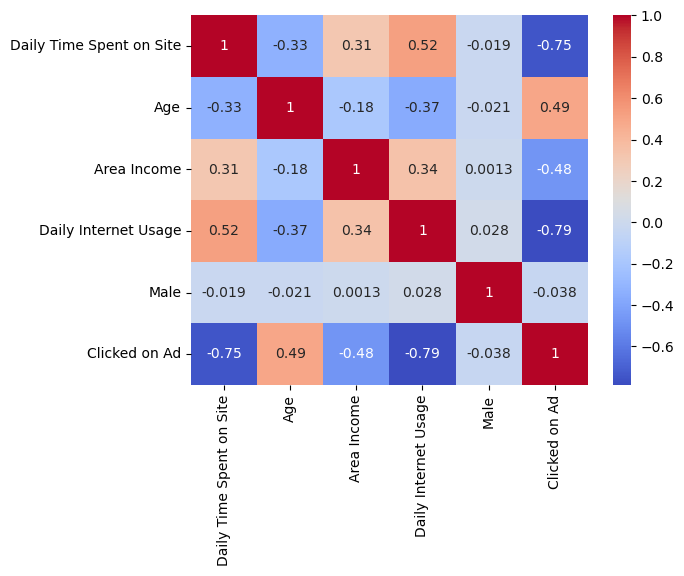

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

There is some negative correlation between "Clicked on Ad" with "Daily Time Spent on Site" and "Daily Internet Usage"

### Finding imbalance in the dataset

In [13]:
data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

<AxesSubplot:>

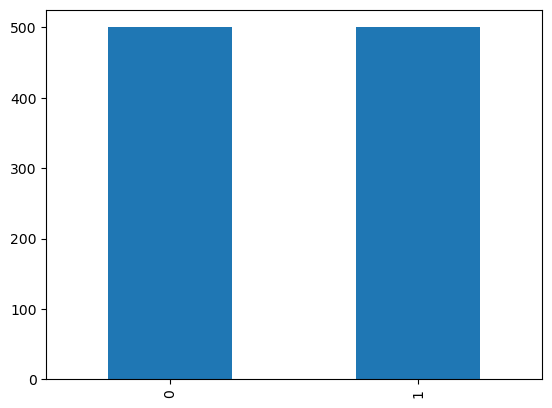

In [17]:
data['Clicked on Ad'].value_counts().plot(kind='bar')

Data is perfectly balanced with equal "clicked" and 'not clicked" outcomes. If the data had some imbalance, we would have to do either oversampling to create additional samples for the minority class or undersampling to remove samples randomly from the majority class to balance the data

In [62]:
# Finding imbalance in gender in the data
data['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

### Looking at the distribution of data (numerical data)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Density'>

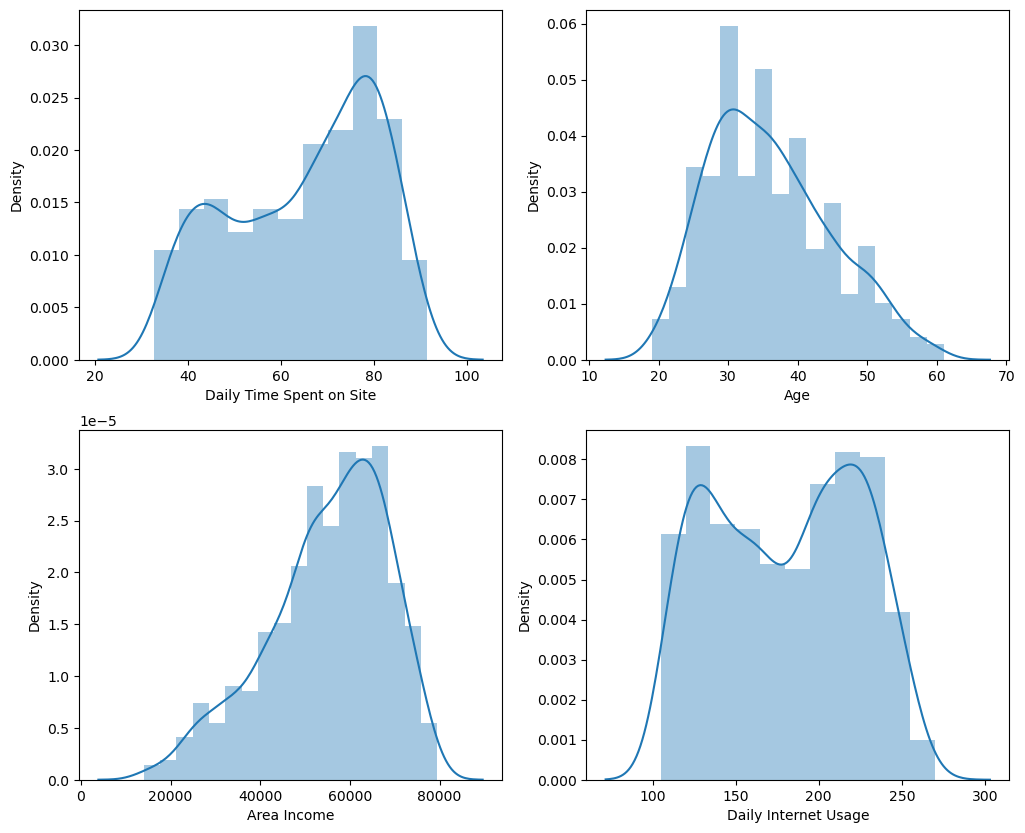

In [23]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize = (12,10))
sns.distplot(data['Daily Time Spent on Site'], ax=ax[0,0])
sns.distplot(data['Age'], ax=ax[0,1])
sns.distplot(data['Area Income'], ax=ax[1,0])
sns.distplot(data['Daily Internet Usage'], ax=ax[1,1])

It can be seen above that 'Daily Time Spent on Site' and 'Daily Internet Usage' has an almost bimodal distribution. 'Age' has almost symmetric normal distribution whereas 'Area Income' has a left-skewed distribution

### Identifying outliers in the data

<AxesSubplot:>

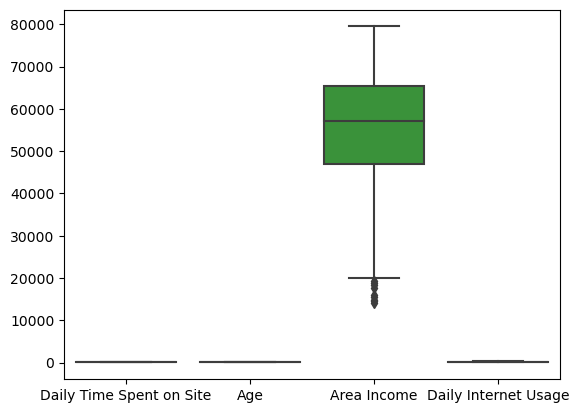

In [20]:
# Plotting a boxplot to identify outliers
sns.boxplot(data=data.drop(columns=['Clicked on Ad','Male']),ax=ax) # Dropping non-numerical columns

The boxplot above does not give a good idea about the data because certain are not scaled properly. For example, Income is very high in numerical value compared to all the other values. So, this data should be scaled and then visualized to identify outliers

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Splitting numerical data
data_numerical = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]

In [46]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_numerical)
scaled_data = pd.DataFrame(data=scaled_data, columns=data_numerical.columns.tolist())

In [47]:
scaled_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0.617882,0.380952,0.730472,0.916031
1,0.809621,0.285714,0.831375,0.538746
2,0.626721,0.166667,0.699200,0.797433
3,0.706272,0.238095,0.623160,0.854280
4,0.608023,0.380952,0.914568,0.731323


<AxesSubplot:>

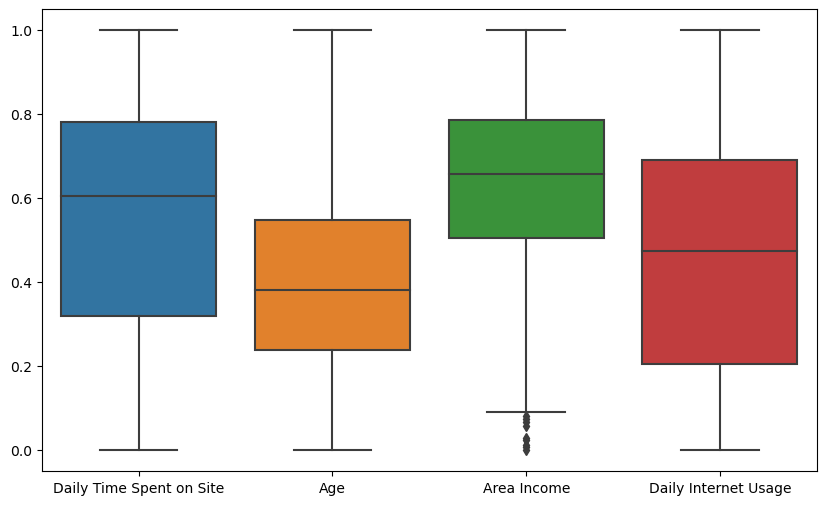

In [51]:
# Plotting boxplot of the scaled data
fig,ax = plt.subplots(figsize = (10,6))
sns.boxplot(data=scaled_data)

There are no major outliers in the data that can impact our model.

### Data Analysis

In [54]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [68]:
# Identifying average time spent on site and internet usage for age below 30
age_filtered_data = data.groupby('Age').mean()[['Daily Time Spent on Site','Daily Internet Usage']]
age_filtered_data[age_filtered_data.index <= 30]

,Daily Time Spent on Site,Daily Internet Usage
Age,,
19,60.966667,187.820000
20,66.708333,194.998333
21,68.460000,208.235000
22,71.010000,198.119231
23,68.333158,184.036842
24,71.245714,193.309048
25,71.360741,202.028519
26,69.430000,199.007027
27,71.093333,198.642727


In [74]:
# Time spent on site and internet usage for each country for top countries
country_grouped_data = data.groupby('Country').sum()[['Daily Time Spent on Site','Daily Internet Usage']]
country_grouped_data.sort_values(by='Daily Internet Usage',ascending=False).head(10)

,Daily Time Spent on Site,Daily Internet Usage
Country,,
Czech Republic,553.81,1685.77
Peru,449.19,1507.41
Micronesia,474.61,1491.18
France,570.88,1478.08
Greece,576.63,1469.67
Liberia,435.91,1414.31
South Africa,476.70,1396.79
Burundi,484.80,1367.67
Luxembourg,484.37,1367.54


### Splitting the data into input and target features

In [81]:
# Splitting the input features into X dataframe
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [53]:
# Splitting the output feature into Y Series
Y = data['Clicked on Ad']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

### Splitting the data into training and testing set 

In [76]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=45)

### Training the Logistic Regression model

In [78]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [80]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

### Model Prediction and Evaluation

In [84]:
# Prediction
Y_pred = model.predict(X_test)

In [85]:
Y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

In [90]:
actual_prediction_df = pd.DataFrame({'Actual Outcome': Y_test, 'Predicted Outcome': Y_pred})
actual_prediction_df

,Actual Outcome,Predicted Outcome
726,0,0
243,0,0
342,0,0
976,1,1
919,0,0
...,...,...
458,1,1
169,0,0
297,0,0
10,1,1


In [93]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.9


We have achieved a 90% accuracy in predicting the classification of clicking and not-clicking on ads